# LAB 4: Working with Real Data

## Introduction

In this lab we are going to work on how to estimate the background from 'real' data. Real is in air quotes because the data is actually from simplified simulations to make the problems manageable in a single lab. But the data will have some features that resemble that of real data sets.

## Getting data and HD5

In general exchanging raw data is a pain. Writing data in text files is error prone, inaccurate, and wastes space, but raw binary files have all sorts of subtleties too (including the internal byte order of our processor). To try and sidestep a whole set of nasty issues, we are going to use HDF5 (originally developed by the National Center for Supercomputing Applications for data exchange) to import the data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (5,5)

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [3]:
data = np.array(hf.get('data'))

In [4]:
data[:,:10]


array([[9.40680016e+08, 9.40680016e+08, 9.40680016e+08, 9.40680016e+08,
        9.40680016e+08, 9.40680016e+08, 9.40680017e+08, 9.40680017e+08,
        9.40680017e+08, 9.40680017e+08],
       [3.15000000e+02, 3.15007112e+02, 3.15014225e+02, 3.15021337e+02,
        3.15028449e+02, 3.15035561e+02, 3.15042674e+02, 3.15049786e+02,
        3.15056898e+02, 3.15064011e+02],
       [4.50000000e+01, 4.50066667e+01, 4.50133333e+01, 4.50200000e+01,
        4.50266667e+01, 4.50333333e+01, 4.50400000e+01, 4.50466667e+01,
        4.50533333e+01, 4.50600000e+01],
       [1.00000000e+01, 8.00000000e+00, 7.00000000e+00, 1.10000000e+01,
        8.00000000e+00, 1.10000000e+01, 5.00000000e+00, 1.00000000e+01,
        9.00000000e+00, 8.00000000e+00]])

## Problem 1

In this problem we are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

### Part 1 

1)We Downloaded the data from the course website (gammaray_lab4.h5), and imported it into our working environment.

The data has 4 columns and more than 25 million rows.

The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts.

We will make a few plots, generally exploring our data and making sure we understand it.WE will give a high level description of the data features we see and specifically comment on whether we see signal contamination in our data, and how we plan to build a background pdf().

Text(0, 0.5, 'count')

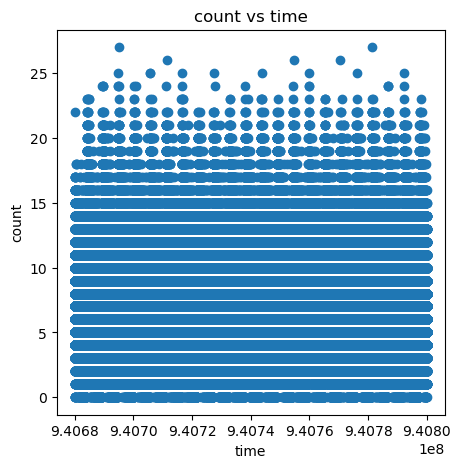

In [5]:
x = data[0,:1200000]
y = data[3,:1200000]
plt.scatter(x, y)
plt.title("count vs time")
plt.xlabel("time")
plt.ylabel("count")

Text(0, 0.5, 'Earth longitude (deg)')

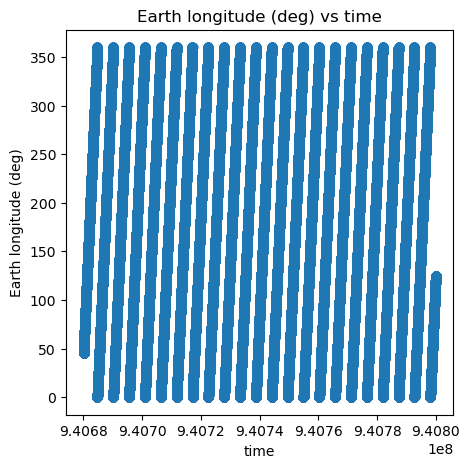

In [6]:
x = data[0,:1200000]
y = data[2,:1200000]
plt.scatter(x, y)
plt.title("Earth longitude (deg) vs time")
plt.xlabel("time")
plt.ylabel("Earth longitude (deg)")

Text(0, 0.5, 'sun phase (deg)')

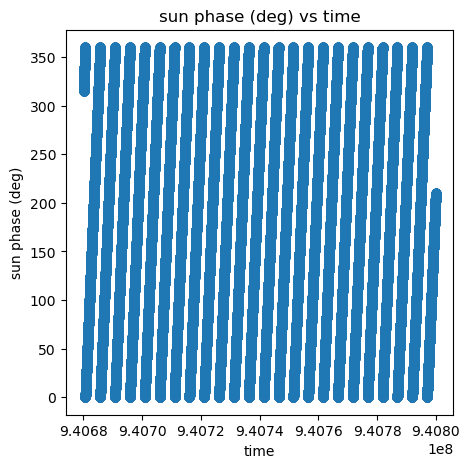

In [7]:
x = data[0,:1200000]
y = data[1,:1200000]
plt.scatter(x, (y))
plt.title("sun phase (deg) vs time")
plt.xlabel("time")
plt.ylabel("sun phase (deg)")

We know that the Time Period of an orbit is 90 minutes which is 90 * 60 = 5400 GPS seconds.As we have data for every 100 milliseconds. The data for 1 time period would correspond to 54000 rows.

The 2Dhistogram for the particle count vs time over 1 Time Period of the orbit

Text(0, 0.5, 'count')

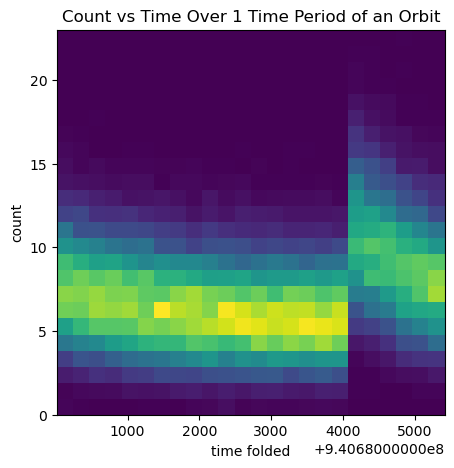

In [8]:
data = np.array(hf.get('data'))
orbit_period = 90*60*10

times = data[0,:54000]

y = data[3,:54000]
plt.hist2d(times, y, bins = 24)
plt.title("Count vs Time Over 1 Time Period of an Orbit")
plt.xlabel("time folded")
plt.ylabel("count")

The 2Dhistogram for the particle count vs time 

Text(0, 0.5, 'count')

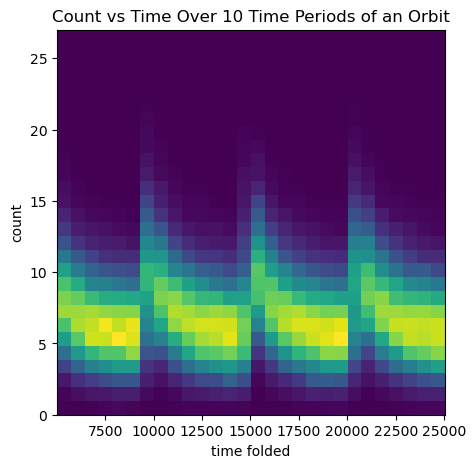

In [16]:
data = np.array(hf.get('data'))
orbit_period = 90*60*10

times = data[0, 50000: 250000]

y = data[3,50000:250000]
plt.hist2d(times % 54000, y, bins = 28)
plt.title("Count vs Time Over 10 Time Periods of an Orbit")
plt.xlabel("time folded")
plt.ylabel("count")

Text(0, 0.5, 'solar phase(deg)')

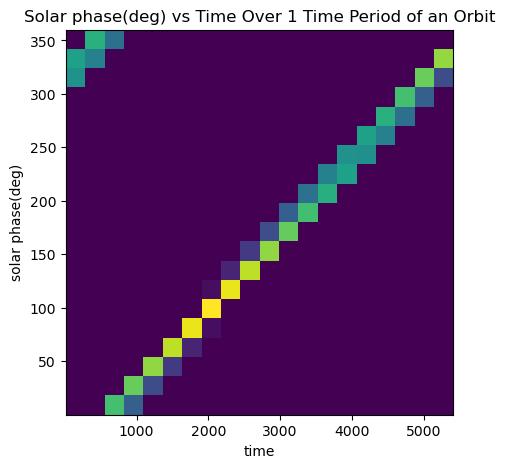

In [25]:
data = np.array(hf.get('data'))
orbit_period = 90*60*10

times = data[0, : 54000]

y = data[1,:54000]
plt.hist2d(times % 54000, y, bins = 20)
plt.title("Solar phase(deg) vs Time Over 1 Time Period of an Orbit")
plt.xlabel("time")
plt.ylabel("solar phase(deg)")

Text(0, 0.5, 'count')

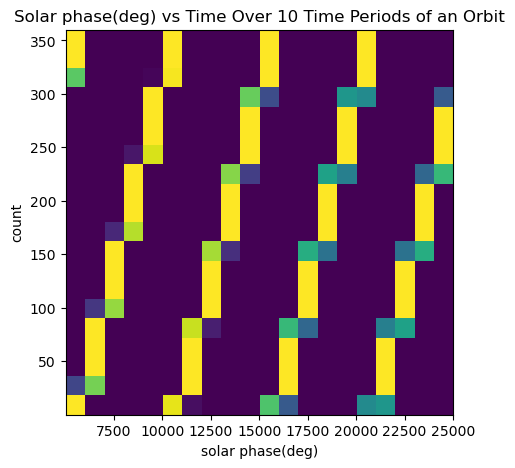

In [22]:
data = np.array(hf.get('data'))
orbit_period = 90*60*10

times = data[0, 50000: 250000]

y = data[1,50000:250000]
plt.hist2d(times % 54000, y, bins = 20)
plt.title("Solar phase(deg) vs Time Over 10 Time Periods of an Orbit")
plt.xlabel("solar phase(deg)")
plt.ylabel("count")

Text(0.5, 1.0, 'count vs sun phase (degrees)')

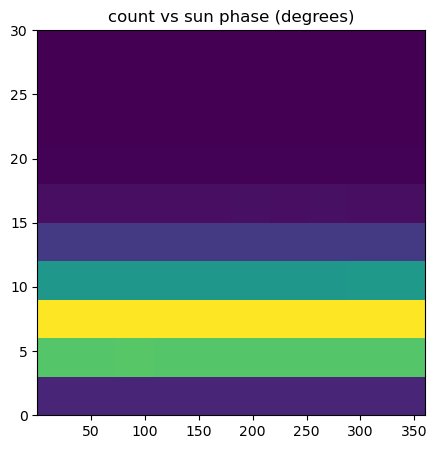

In [10]:
x = data[1,:]
y = data[3,:]
plt.hist2d(x, y, bins = 10)
plt.title("count vs sun phase (degrees)")

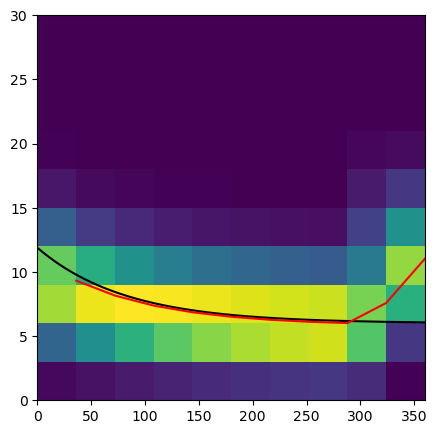

In [11]:
x = data[2,:]
y = data[3,:]
h, xedges, yedges, _ = plt.hist2d(x, y, bins = 10)
ave = []
for i in h:
    total = 0
    for n in range(len(i)):
            total+=n*i[n]
    ave.append(total/len(i)/7e4)
xk = np.arange(0,360)
plt.plot(xk, (np.exp(((-.7*(xk - 145 ) * np.pi * 2)/ 360))) + 6, c = 'k')
plt.plot(xedges[1:], ave, c='r', label='Average') 

No handles with labels found to put in legend.


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

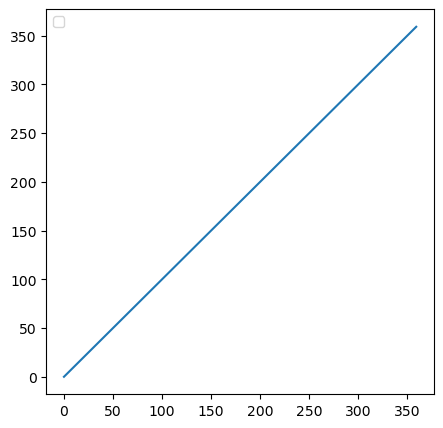

In [12]:
plt.plot(np.arange(0,360))
plt.legend()
plt.colorbar()
plt.title("count vs Earth longitude (degrees)")

In [ ]:
x = data[0,:]
y = data[3,:]
h, xedges, yedges, _ = plt.hist2d(x, y, bins = 10)
ave = []
for i in h:
    total = 0
    for n in range(len(i)):
            total+=n*i[n]
            
plt.title("count vs time")

In [ ]:
x = data[2,:]
y = data[3,:]

plt.scatter(x, y)
plt.title("count vs Earth longitude (degrees)")
plt.show()